<a href="https://colab.research.google.com/github/forhigh/deeplearning_undergrad/blob/main/%5Bcomplete%5Dlab_app_Kramer_ex0702_uniform%20damped%20soil%20on%20rigid%20rock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/gdrive


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


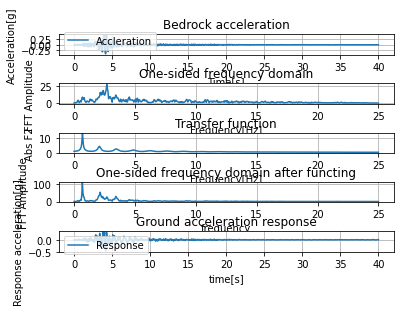

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#loading earthquake
from google.colab import drive
drive.mount('/content/gdrive')
y1 = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/gilroyv1024.csv", names = ["acc_bore [g]"])

y1 = np.array(y1)

y1 = y1.flatten()
y=y1/980
t=np.linspace(0,40,2000)
#setting for fft
fs = 50
length = len(y)
window_size= 1024
window= np.hamming(window_size)
y = y.flatten()
y2=window*y[:window_size]
#fft
z=np.fft.fft(y)
fz=np.linspace(0, fs, length)
Y = np.fft.fft(y2[:window_size])
y_values = np.abs(Y[:window_size//2])*2000/(512)
f = np.linspace(0, fs/2, window_size//2)
#frequency function
fs=50
ξ = 0.05
v = 1500
H = 540
def F(w):
    return 1 / ((np.cos(w * H / v) ** 2 + (ξ * w * H / v) ** 2) ** 0.5)
w = 2 * np.pi * f
Y_fft2 = y_values * np.abs(F(w))
#ifft
f2 = np.linspace(0, fs/2, length)
def F2(w):
    return 1 / ((np.cos(w2 * H / v) ** 2 + (ξ * w2 * H / v) ** 2) ** 0.5)
w2 = 2 * np.pi * f2
zi=z*F2(w)
iY = np.fft.ifft(zi)
#plot
#loaded earthquake
plt.subplot(9,1,1)
plt.plot(t,y, label='Accleration')
plt.xlabel('Time[s]')
plt.ylabel('Acceleration[g]')
plt.title('Bedrock acceleration')
plt.legend()
plt.grid()
#frequency domain one size
plt.subplot(9,1,3)
plt.plot(f,y_values)
plt.xlabel('Frequency[Hz]')
plt.ylabel('FFT Amplitude')
plt.title('One-sided frequency domain')
plt.grid()
#transfer function F3
plt.subplot(9,1,5)
plt.plot(f2,abs(F2(w)))
plt.xlabel('Frequency[Hz]')
plt.ylabel('Abs F2')
plt.title('Transfer function')
plt.grid()
#frequency domain (after functioning)
plt.subplot(9,1,7)
plt.plot(f, Y_fft2)
plt.xlabel('frequency')
plt.ylabel('FFT Amplitude')
plt.title('One-sided frequency domain after functing')
plt.grid()
#signal after IFFT
plt.subplot(9,1,9)
plt.plot(t,iY, label='Response')
plt.xlabel('time[s]')
plt.ylabel('Response acceleration[g]')
plt.title('Ground acceleration response')
plt.legend()
plt.grid()
plt.show()